In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
mat = loadmat("ex7data2.mat")
X = mat["X"]

## Finding closest centroids

In [3]:
def findClosestCentroids(X, centroids):
    """
    Returns the closest centroids in idx for a dataset X where each row is a single example.
    """
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0],1))
    temp = np.zeros((centroids.shape[0],1))
    
    for i in range(X.shape[0]):
        for j in range(K):
            dist = X[i,:] - centroids[j,:]
            length = np.sum(dist**2)
            temp[j] = length
        idx[i] = np.argmin(temp)+1
    return idx

In [4]:
# Select an initial set of centroids
K = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]])
idx = findClosestCentroids(X, initial_centroids)
print("Closest centroids for the first 3 examples:\n",idx[0:3])

Closest centroids for the first 3 examples:
 [[1.]
 [3.]
 [2.]]


## Computing centroid means

In [5]:
def computeCentroids(X, idx, K):
    """
    returns the new centroids by computing the means of the data points assigned to each centroid.
    """
    m, n = X.shape[0],X.shape[1]
    centroids = np.zeros((K,n))
    count = np.zeros((K,1))
    
    for i in range(m):
        index = int((idx[i]-1)[0])
        centroids[index,:]+=X[i,:]
        count[index]+=1
    
    return centroids/count

In [6]:

centroids = computeCentroids(X, idx, K)
print("Centroids computed after initial finding of closest centroids:\n", centroids)

Centroids computed after initial finding of closest centroids:
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


## Visualizing K-means Clustering

In [7]:
def plotKmeans(X, centroids, idx, K, num_iters):
    """
    plots the data points with colors assigned to each centroid
    """
    m,n = X.shape[0],X.shape[1]
    
    fig, ax = plt.subplots(nrows=num_iters,ncols=1,figsize=(6,36))
    
    for i in range(num_iters):    
        # Visualisation of data
        color = "rgb"
        for k in range(1,K+1):
            grp = (idx==k).reshape(m,1)
            ax[i].scatter(X[grp[:,0],0],X[grp[:,0],1],c=color[k-1],s=15)

        # visualize the new centroids
        ax[i].scatter(centroids[:,0],centroids[:,1],s=120,marker="x",c="black",linewidth=3)
        title = "Iteration Number " + str(i)
        ax[i].set_title(title)
        
        # Compute the centroids mean
        centroids = computeCentroids(X, idx, K)
        
        # assign each training example to the nearest centroid
        idx = findClosestCentroids(X, centroids)
    
    plt.tight_layout()

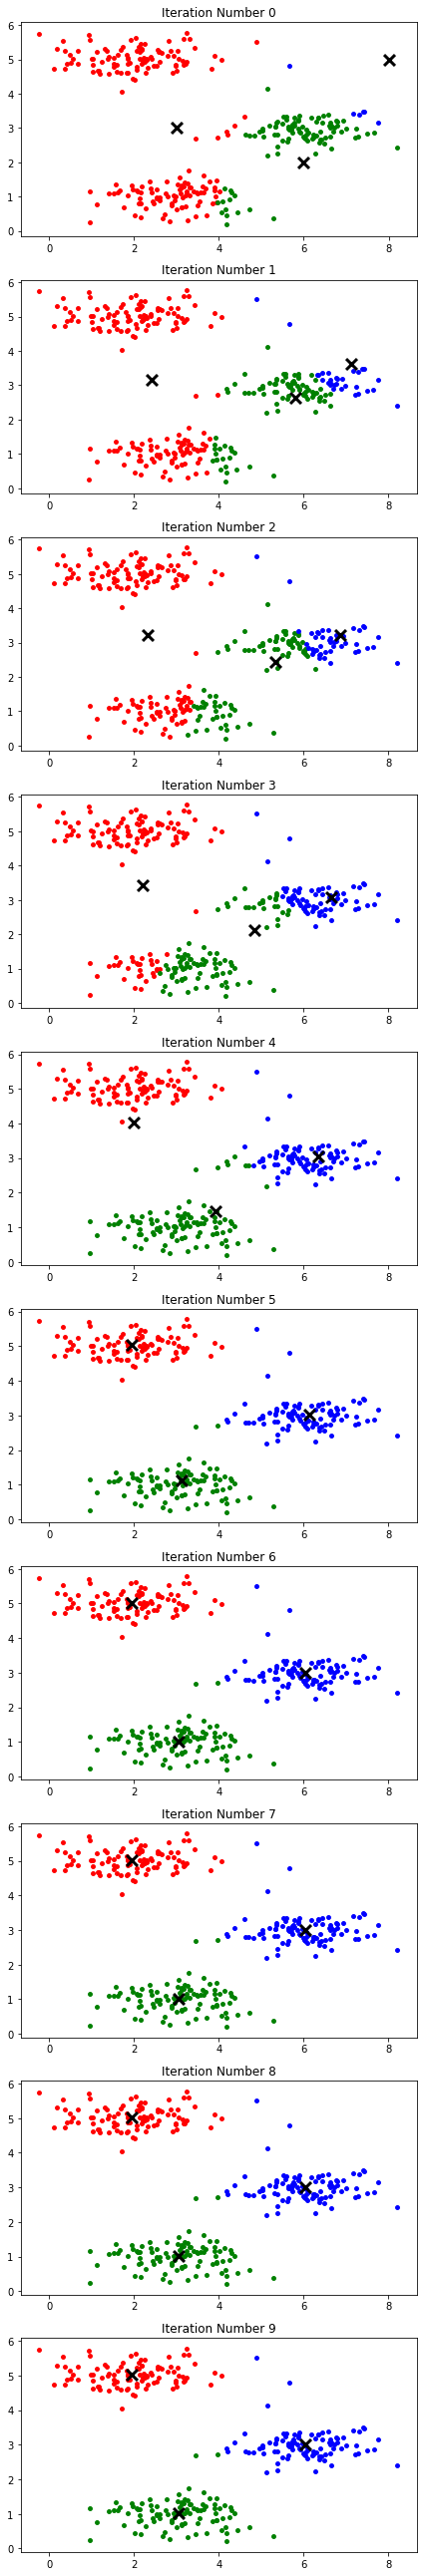

In [8]:
m,n = X.shape[0],X.shape[1]
plotKmeans(X, initial_centroids,idx, K,10)

## Random Initialization

In [9]:
def kMeansInitCentroids(X, K):
    """
    This function initializes K centroids that are to beused in K-Means on the dataset X
    """
    m,n = X.shape[0], X.shape[1]
    centroids = np.zeros((K,n))
    
    for i in range(K):
        centroids[i] = X[np.random.randint(0,m+1),:]
        
    return centroids

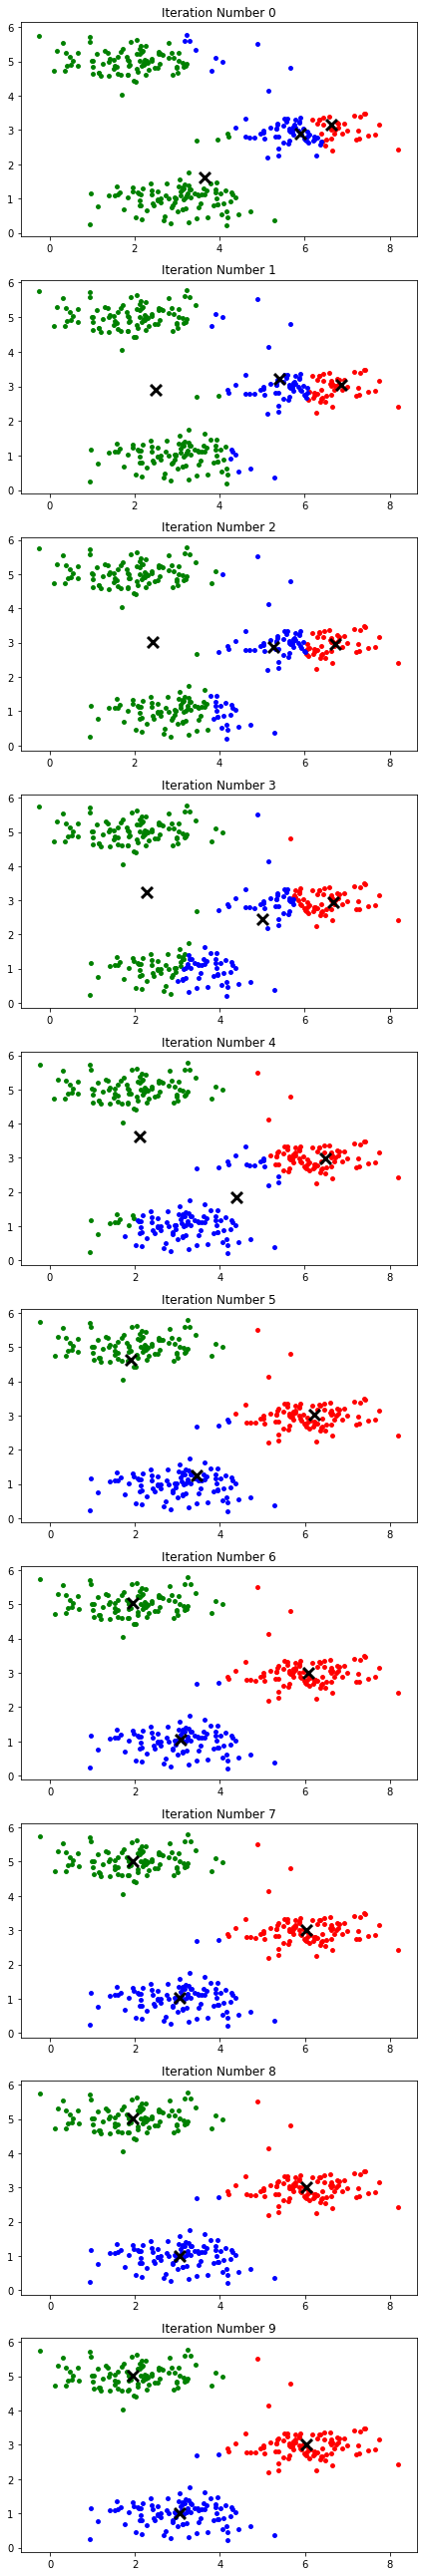

In [10]:
centroids = kMeansInitCentroids(X, K)
idx = findClosestCentroids(X, centroids)
plotKmeans(X, centroids,idx, K,10)

## Image Compression with K-meana

In [11]:
mat2 = loadmat("bird_small.mat")
A = mat2["A"]

# preprocess and reshape the image
X2 = (A/255).reshape(128*128,3)

In [12]:
def runKmeans(X, initial_centroids,num_iters,K):
    
    idx = findClosestCentroids(X, initial_centroids)
    
    for i in range(num_iters):
        
        # Compute the centroids mean
        centroids = computeCentroids(X, idx, K)

        # assign each training example to the nearest centroid
        idx = findClosestCentroids(X, initial_centroids)

        
    return centroids, idx

In [14]:
# Running K-means algorithm on the data
K2 = 16
num_iters = 10
initial_centroids2 = kMeansInitCentroids(X2, K2)
centroids2, idx2 = runKmeans(X2, initial_centroids2, num_iters,K2)

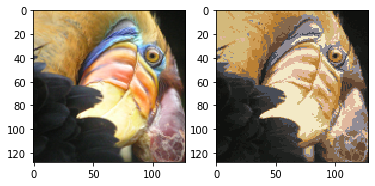

In [15]:
m2,n2 = X.shape[0],X.shape[1]
X2_recovered = X2.copy()
for i in range(1,K2+1):
    X2_recovered[(idx2==i).ravel(),:] = centroids2[i-1]

# Reshape the recovered image into proper dimensions
X2_recovered = X2_recovered.reshape(128,128,3)

# Display the image
import matplotlib.image as mpimg
fig, ax = plt.subplots(1,2)
ax[0].imshow(X2.reshape(128,128,3))
ax[1].imshow(X2_recovered)